# 1. Problem
<div style="position:relative">
  <div style="float:right; margin:0 0 1em 1em">
    <img src="https://zindpublic.blob.core.windows.net/public/uploads/image_attachment/image/434/969398cc-ff57-4c11-95be-7f3a47652251.png" alt="Portrait" width="100">
  </div>
  <div style="margin-top:50px">
    <p><b>Expresso</b> is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning” .</p>
    <p><b>Defination of Churning</b>
      A customer who is becoming inactive and not making any transactions for 90 days.
    </p>
  </div>
</div>

# 2. EDA, DP & FE

We are going to follow the process below to figure it out before we do data modeling.

<img src=https://miro.medium.com/v2/resize:fit:1400/format:webp/1*c9mmBc2UJ-aQRGANRP0bJg.png width=600 />

**2.1 Exploratory data analysis**

Load the data from Kaggle/input directory. Show top 5 records of the dataframe.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/expresso-churn-prediction-challenge/Train.csv')
df.head()

/kaggle/input/expresso-churn-prediction-challenge/SampleSubmission.csv
/kaggle/input/expresso-churn-prediction-challenge/Train.csv
/kaggle/input/expresso-churn-prediction-challenge/Test.csv


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


Drop unnecessary columns, delete rows with values of NA, remove duplicates.

In [2]:
df.columns

df = df.drop(['user_id'], axis=1, errors='ignore') # delete the two columns that don't affect our model
df.duplicated().sum() # check duplicates
df = df.dropna() # drop lines with NaN

#df.head()
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000,10839.000000
mean,16442.895931,27.111818,16732.591106,5577.532152,33.330012,7301.918350,432.547837,234.347357,36.493680,9.877203,9.285451,55.306394,18.780054,0.001476
std,13816.040978,19.025954,13975.663695,4658.554268,19.076706,12869.651518,1117.130791,348.501459,86.058411,49.879415,29.901377,10.060160,20.025398,0.038394
min,200.000000,1.000000,198.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,7800.000000,12.000000,7998.000000,2666.000000,18.000000,4.000000,19.000000,38.000000,3.000000,0.000000,0.000000,52.000000,6.000000,0.000000
50%,13000.000000,23.000000,13352.000000,4451.000000,30.000000,2082.000000,88.000000,116.000000,11.000000,1.000000,2.000000,60.000000,13.000000,0.000000
75%,20900.000000,38.000000,21217.000000,7072.500000,45.000000,9562.000000,354.000000,296.000000,35.000000,4.000000,6.000000,62.000000,25.000000,0.000000
max,235000.000000,131.000000,226150.000000,75383.000000,91.000000,201413.000000,19950.000000,5543.000000,2144.000000,1609.000000,1324.000000,62.000000,560.000000,1.000000


**2.2 Data Preprecessing**

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.info() 

# data types of ‘object’ are not suitable for ML model input.
df.MRG = le.fit_transform(df.MRG)
df.TENURE = le.fit_transform(df.TENURE)
df.REGION = le.fit_transform(df.REGION)
df.TOP_PACK = le.fit_transform(df.TOP_PACK)

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 2153831
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          10839 non-null  object 
 1   TENURE          10839 non-null  object 
 2   MONTANT         10839 non-null  float64
 3   FREQUENCE_RECH  10839 non-null  float64
 4   REVENUE         10839 non-null  float64
 5   ARPU_SEGMENT    10839 non-null  float64
 6   FREQUENCE       10839 non-null  float64
 7   DATA_VOLUME     10839 non-null  float64
 8   ON_NET          10839 non-null  float64
 9   ORANGE          10839 non-null  float64
 10  TIGO            10839 non-null  float64
 11  ZONE1           10839 non-null  float64
 12  ZONE2           10839 non-null  float64
 13  MRG             10839 non-null  object 
 14  REGULARITY      10839 non-null  int64  
 15  TOP_PACK        10839 non-null  object 
 16  FREQ_TOP_PACK   10839 non-null  float64
 17  CHURN           10839 non-null  in

Visualize our data.

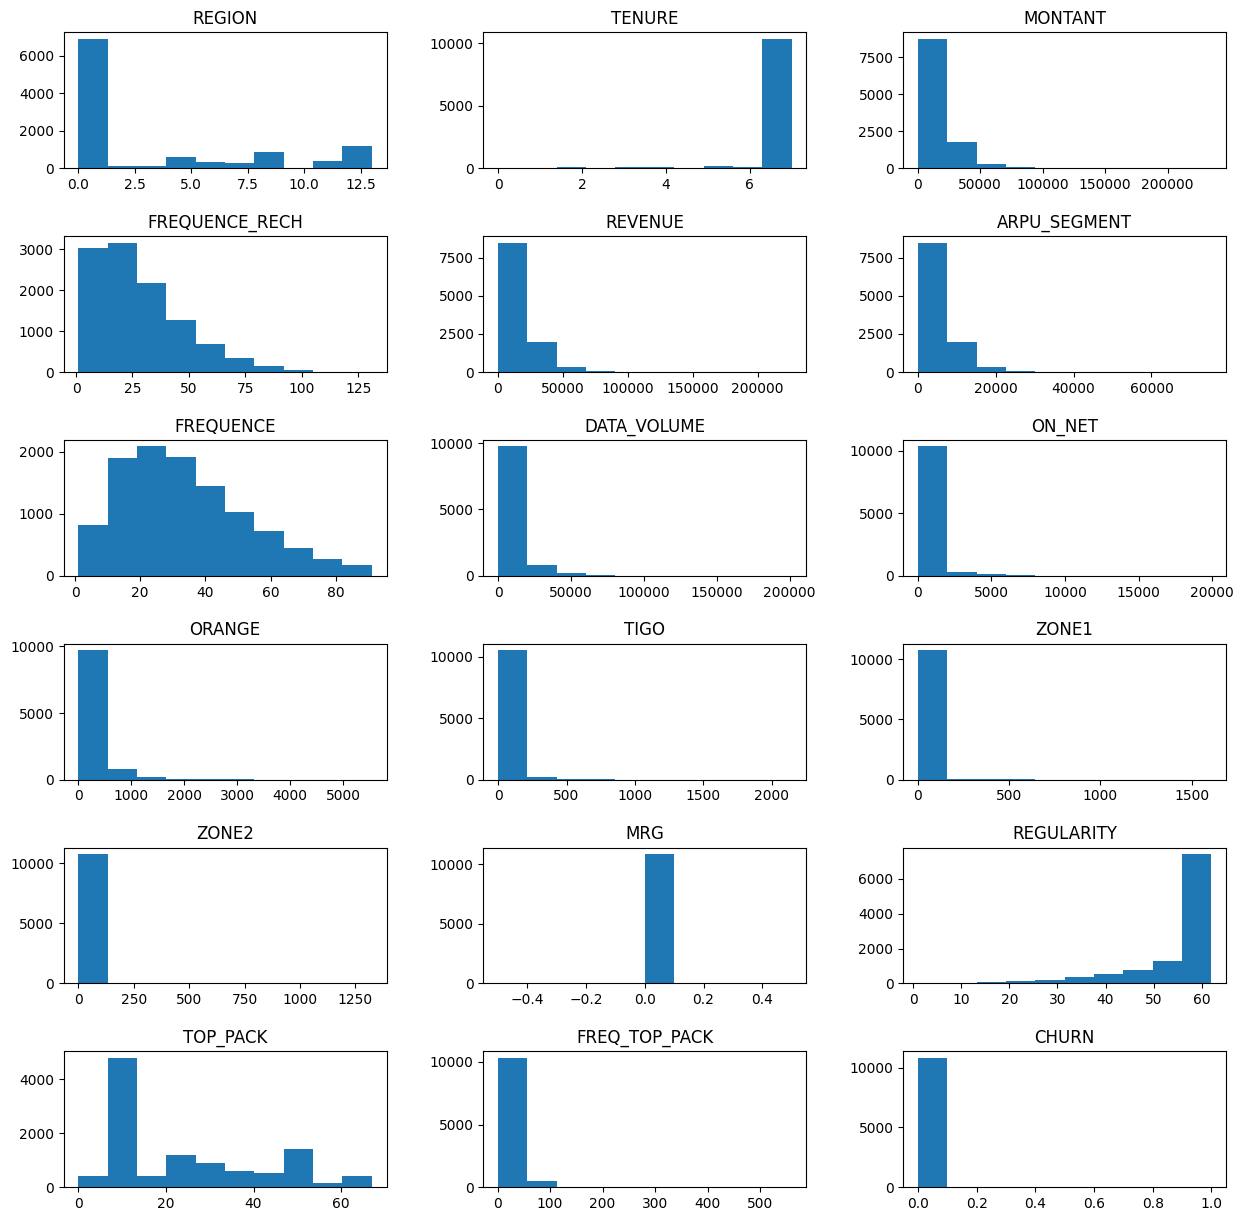

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))

for idx, column in enumerate(df.columns):
    row = idx // 3
    col = idx % 3
    #axs[row, col].scatter(df.index, df[column])
    axs[row, col].hist(df[column])
        
    axs[row, col].set_title(column)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

**2.3 Feature Engineering**

# 3. Data Modeling

# 5. Conclusion